Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

We can choose randomly about the no. of clusters but its not a good practice

In [ ]:
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_4 = kmeans_4.fit_predict(X)

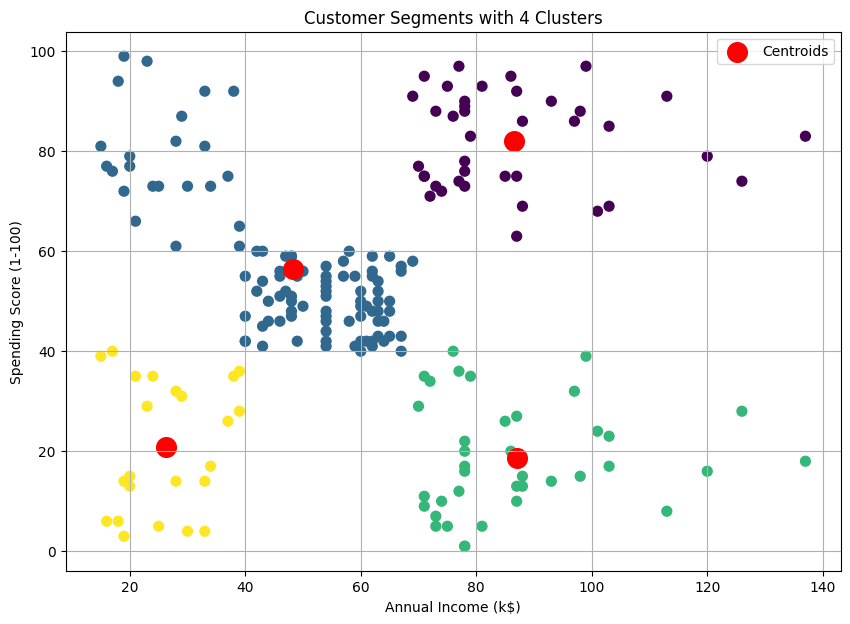

In [25]:
# Adding the cluster information to the original dataframe
df['Cluster_4'] = clusters_4

# Visualizing the clusters with 4 clusters
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_4, s=50, cmap='viridis')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Customer Segments with 4 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


Check for the number of clusters we can form properly usin elbow method

In [26]:
def plot_elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 7))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method to Determine Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Square)')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

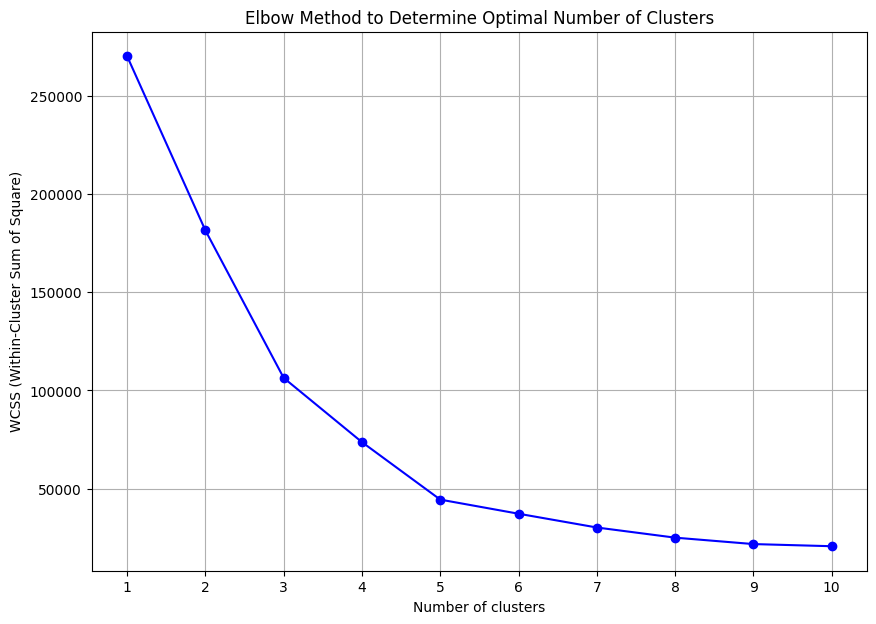

In [27]:
plot_elbow_method(X)

Here curve is moving very closely around 5 so we will take number of cluster as 5

In [28]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_5 = kmeans_5.fit_predict(X)

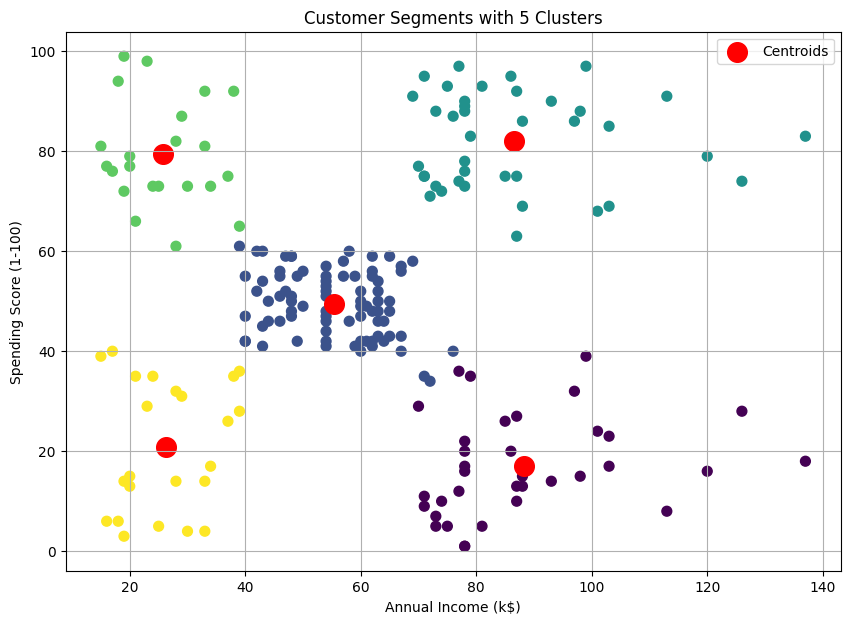

In [29]:
df['Cluster_5'] = clusters_5

# Visualizing the clusters with 5 clusters
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_5, s=50, cmap='viridis')
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Customer Segments with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Other important visualizations

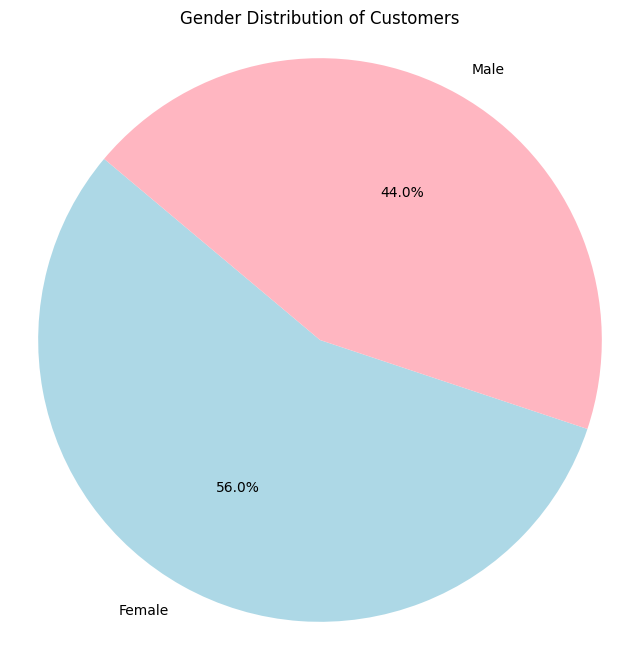

In [30]:
# Count the number of male and female customers
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Customers')
plt.axis('equal')
plt.show()